In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
dataset = pd.read_csv('weight-height.csv')
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
dataset.nunique()

Gender        2
Height    10000
Weight    10000
dtype: int64

In [5]:
dataset['Height'] = dataset['Height']*2.5
dataset['Weight'] = dataset['Weight']/2.5
dataset.head()

,Gender,Height,Weight
0,Male,184.617543,96.757425
1,Male,171.954760,64.924189
2,Male,185.275263,85.096342
3,Male,179.327446,88.016988
4,Male,174.704490,82.539920


In [6]:
dfm = dataset[dataset["Gender"] == "Male"]
dfm


,Gender,Height,Weight
0,Male,184.617543,96.757425
1,Male,171.954760,64.924189
2,Male,185.275263,85.096342
3,Male,179.327446,88.016988
4,Male,174.704490,82.539920
...,...,...,...
4995,Male,172.150156,70.852421
4996,Male,172.433557,63.714091
4997,Male,167.534487,79.678160
4998,Male,178.894296,74.362364


In [7]:
dfw = dataset[dataset["Gender"] == "Female"]
dfw

,Gender,Height,Weight
5000,Female,147.276830,40.835331
5001,Female,163.075031,56.522329
5002,Female,158.422509,52.416561
5003,Female,161.199994,51.268604
5004,Female,154.482740,51.912563
...,...,...,...
9995,Female,165.431630,54.710982
9996,Female,167.667887,68.347162
9997,Female,159.669981,51.390128
9998,Female,172.585608,65.540985


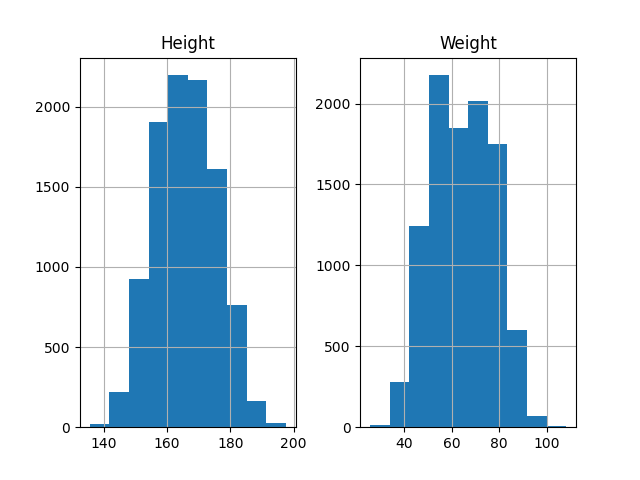

In [8]:
dataset.hist()
plt.show()

In [9]:
def amountRows(dfm):
  return len(dfm)
amountRows(dfm)

5000

In [10]:
def mean(coloumn):
  sumValues = 0
  for i in coloumn:
    sumValues += i
  return sumValues / amountRows(coloumn)
mean(dfm['Weight'])

74.80824826327729

In [11]:
def Variance(column):
  mathMean = mean(column)
  for i in column:
    variance = (i - mathMean)**2
  return (1/mathMean)*variance;
Variance (dfm['Weight'])

0.30198001092237525

In [12]:
dfm['Weight'].std()

7.91246180670552

In [13]:
dfm['Weight'].max()

107.99587940204239

In [14]:
dfm['Weight'].min()

45.1611757791272

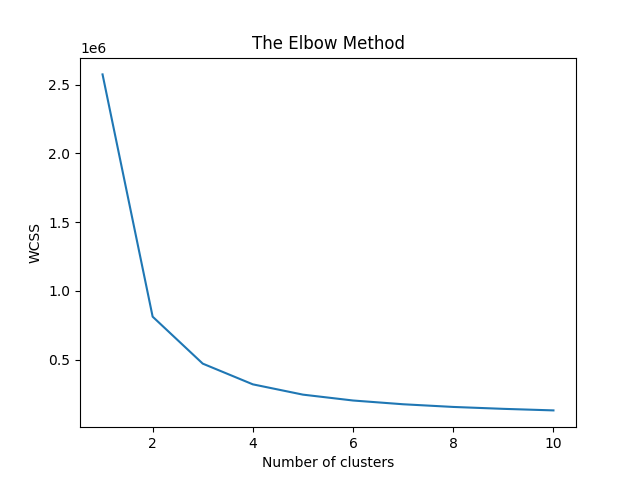

[2574482.5347045576, 811672.6363454589, 470015.87258621264, 319334.2073823993, 244459.12691152332, 201749.50312369879, 174429.92958137512, 154930.14895903433, 141082.02592836798, 129772.93986336744]


In [15]:
X = dataset.iloc[:, [ 1, 2]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print(wcss)

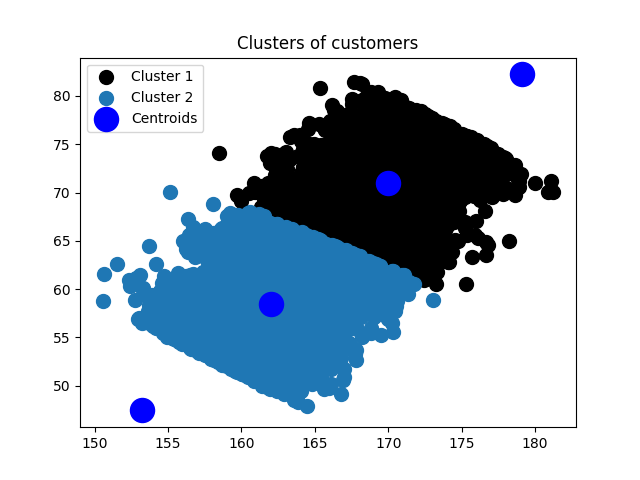

In [16]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'black', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [17]:
print(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1])

[171.95476011 171.96270313 170.87128878 ... 170.10266282 167.66788662
 172.58560783] [64.92418901 73.57115544 67.1884442  ... 68.20568505 68.34716236
 65.54098454]


In [18]:
true_dataset = pd.read_csv('weight-height.csv')
true_dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [19]:
clusters = true_dataset.iloc[:,2].values
print(clusters)

[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


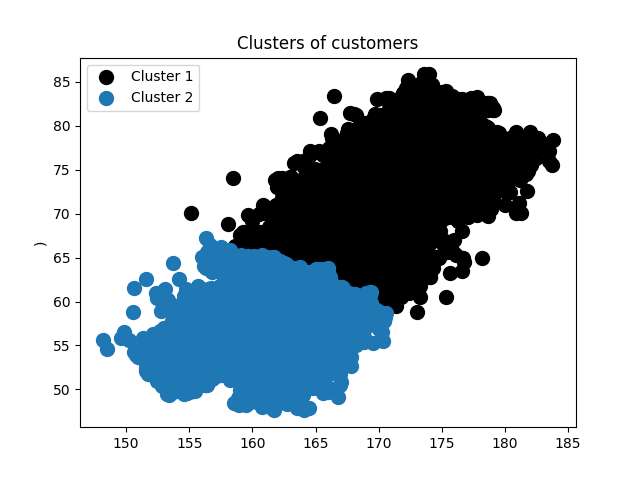

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'black', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('')
plt.ylabel(')')
plt.legend()
plt.show()

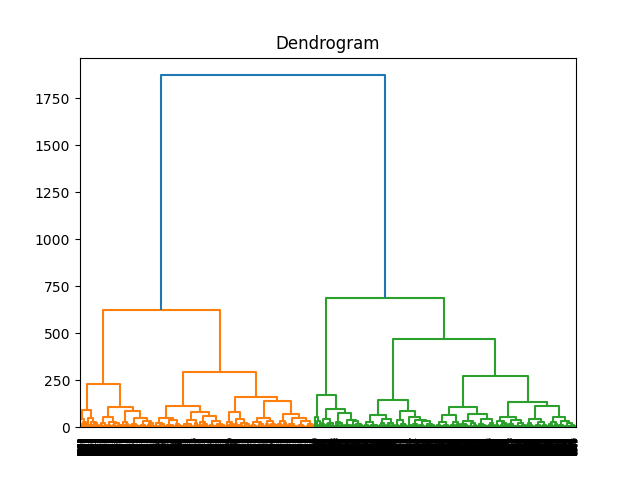

In [21]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [22]:
dataset.loc[dataset["Gender"] == "Male", "Gender"] = 1
dataset.loc[dataset["Gender"] == "Female", "Gender"] = 0
dataset.head()

,Gender,Height,Weight
0,1,184.617543,96.757425
1,1,171.954760,64.924189
2,1,185.275263,85.096342
3,1,179.327446,88.016988
4,1,174.704490,82.539920


In [23]:
dfm.describe()
dfm.describe()
dfm.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,172.565865,74.808248
std,7.158406,7.912462
min,146.017262,45.161176
25%,167.936698,69.555107
50%,172.569271,74.813418
75%,177.471859,80.143121
max,197.496856,107.995879


In [24]:
kmeans.score([[172,73]])

-7.9067062564382855